Adam Peetz <br>
October 9th 2022<br>
MSDS680 Week 7 Assignment<br>
Regis University<br>
Professor Nasheb Ismaily<br>

# Reinforcement Learning

Reinforcement learning refers to a collection of programming methods for creating policies that allow an agent to act in an environment with the goal of achieving the greatest possible reward. This machine learning method is set apart from supervised an unsupervised learning in that it does not require large amounts of base data to start. An agent must simply be aware of its environment, have the power to act on it, and observe the results of those actions with a defined reward to engage in reinforcement learning. Reinforcement learning methods create superhuman agents that employ novel solutions to achieve their goals. <br>

Tabular Q learning is a reinforcement learning method that creates a Q table that records desired actions for states in the environment. The recommended actions in the Q table are tempered by the agents’ expectations of reward. Over time the Q values in the table are adjusted to create an optimum policy that allows an agent successfully act in its environment. <br>

OpenAI gym is a reinforcement learning playground that allows developers to attack reinforcement learning problems in a sandbox environment. To demonstrate tabular Q learning, a mountaincar environment from OpenAI gym will be used. The goal of the mountaincar problem is to push a car caught in a valley up a hill by gradually increasing its momentum as it rolls back and forth between sides of the hill. <br>

The code in the next cell will train an agent to solve the problem over 5000 episodes and save the results of every 100 episodes for analysis. The code was adapted from Harrison at pythonprogramming.net.

# Agent Training


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0")
env.reset()

learning_rate = 0.1
discount = 0.95
episodes = 5000

show_every = 100

discrete_os_size = [20]*len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_os_size

epsilon = 0.5
start_epsilon_decaying = 1
end_epsilon_decaying = episodes // 2
epsilon_decay_value = epsilon/(end_epsilon_decaying - start_epsilon_decaying)

q_table = np.random.uniform(low=-2, high=0, size=(discrete_os_size + [env.action_space.n]))

ep_rewards = []
aggr_ep_reward = {'ep':[],'avg':[],'min':[],'max':[]}


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(int))

for episode in range(episodes):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False
    truncated = False
    if episode % show_every == 0:
        render = True
        print(episode)
    else:
        render = False
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
        #action = np.argmax(q_table[discrete_state])
        new_state, reward, done, info = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)
        if render:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            new_q = (1-learning_rate) * current_q + learning_rate * (reward + discount * max_future_q)
            q_table[discrete_state + (action, )] = new_q
        elif new_state[0] >= env.goal_position:
            print(f'Solved on episode {episode}')
            q_table[discrete_state + (action, )] = 0 
            
        discrete_state = new_discrete_state
    if end_epsilon_decaying >= episode >= start_epsilon_decaying:
        epsilon -= epsilon_decay_value
    ep_rewards.append(episode_reward)
    if not episode % show_every:

        average_reward = sum(ep_rewards[-show_every:])/len(ep_rewards[-show_every:])
        aggr_ep_reward['ep'].append(episode)
        aggr_ep_reward['avg'].append(average_reward)
        aggr_ep_reward['min'].append(min(ep_rewards[-show_every:]))
        aggr_ep_reward['max'].append(max(ep_rewards[-show_every:]))
        
        print(f"Episode: {episode} Avg: {average_reward} Min: {min(ep_rewards[-show_every:])} Max: {max(ep_rewards[-show_every:])}")
        np.save(f"qtables_{episode}-qtable",q_table)
        
env.close()


0
Episode: 0 Avg: -200.0 Min: -200.0 Max: -200.0
100
Episode: 100 Avg: -200.0 Min: -200.0 Max: -200.0
200
Episode: 200 Avg: -200.0 Min: -200.0 Max: -200.0
300
Episode: 300 Avg: -200.0 Min: -200.0 Max: -200.0
400
Episode: 400 Avg: -200.0 Min: -200.0 Max: -200.0
500
Episode: 500 Avg: -200.0 Min: -200.0 Max: -200.0
600
Episode: 600 Avg: -200.0 Min: -200.0 Max: -200.0
700
Episode: 700 Avg: -200.0 Min: -200.0 Max: -200.0
800
Episode: 800 Avg: -200.0 Min: -200.0 Max: -200.0
900
Episode: 900 Avg: -200.0 Min: -200.0 Max: -200.0
Solved on episode 903
1000
Episode: 1000 Avg: -200.0 Min: -200.0 Max: -200.0
Solved on episode 1016
Solved on episode 1024
Solved on episode 1025
Solved on episode 1027
Solved on episode 1028
1100
Episode: 1100 Avg: -199.26 Min: -200.0 Max: -171.0
Solved on episode 1113
Solved on episode 1116
Solved on episode 1124
Solved on episode 1154
Solved on episode 1159
Solved on episode 1165
Solved on episode 1182
Solved on episode 1184
Solved on episode 1188
Solved on episode 1

Solved on episode 2264
Solved on episode 2266
Solved on episode 2268
Solved on episode 2270
Solved on episode 2271
Solved on episode 2272
Solved on episode 2273
Solved on episode 2275
Solved on episode 2277
Solved on episode 2281
Solved on episode 2282
Solved on episode 2283
Solved on episode 2284
Solved on episode 2286
Solved on episode 2287
Solved on episode 2288
2300
Episode: 2300 Avg: -177.36 Min: -200.0 Max: -124.0
Solved on episode 2326
Solved on episode 2328
Solved on episode 2395
Solved on episode 2398
Solved on episode 2399
2400
Solved on episode 2400
Episode: 2400 Avg: -198.25 Min: -200.0 Max: -152.0
Solved on episode 2401
Solved on episode 2403
Solved on episode 2404
Solved on episode 2406
Solved on episode 2407
Solved on episode 2408
Solved on episode 2409
Solved on episode 2410
Solved on episode 2411
Solved on episode 2412
Solved on episode 2413
Solved on episode 2414
Solved on episode 2416
Solved on episode 2417
Solved on episode 2418
Solved on episode 2419
Solved on epis

Solved on episode 2845
Solved on episode 2847
Solved on episode 2850
Solved on episode 2851
Solved on episode 2852
Solved on episode 2854
Solved on episode 2855
Solved on episode 2856
Solved on episode 2857
Solved on episode 2859
Solved on episode 2860
Solved on episode 2861
Solved on episode 2863
Solved on episode 2864
Solved on episode 2867
Solved on episode 2868
Solved on episode 2869
Solved on episode 2870
Solved on episode 2872
Solved on episode 2873
Solved on episode 2874
Solved on episode 2877
Solved on episode 2878
Solved on episode 2879
Solved on episode 2881
Solved on episode 2887
Solved on episode 2888
Solved on episode 2892
Solved on episode 2893
Solved on episode 2896
Solved on episode 2897
Solved on episode 2899
2900
Episode: 2900 Avg: -178.83 Min: -200.0 Max: -120.0
Solved on episode 2903
Solved on episode 2904
Solved on episode 2907
Solved on episode 2908
Solved on episode 2909
Solved on episode 2910
Solved on episode 2911
Solved on episode 2912
Solved on episode 2913
S

Solved on episode 3318
Solved on episode 3319
Solved on episode 3320
Solved on episode 3321
Solved on episode 3322
Solved on episode 3323
Solved on episode 3324
Solved on episode 3325
Solved on episode 3326
Solved on episode 3327
Solved on episode 3328
Solved on episode 3329
Solved on episode 3330
Solved on episode 3331
Solved on episode 3332
Solved on episode 3333
Solved on episode 3334
Solved on episode 3335
Solved on episode 3336
Solved on episode 3337
Solved on episode 3338
Solved on episode 3339
Solved on episode 3340
Solved on episode 3341
Solved on episode 3342
Solved on episode 3343
Solved on episode 3344
Solved on episode 3345
Solved on episode 3346
Solved on episode 3347
Solved on episode 3348
Solved on episode 3349
Solved on episode 3350
Solved on episode 3351
Solved on episode 3352
Solved on episode 3353
Solved on episode 3354
Solved on episode 3355
Solved on episode 3356
Solved on episode 3357
Solved on episode 3358
Solved on episode 3359
Solved on episode 3360
Solved on e

Solved on episode 3700
Episode: 3700 Avg: -173.8 Min: -200.0 Max: -145.0
Solved on episode 3701
Solved on episode 3702
Solved on episode 3703
Solved on episode 3704
Solved on episode 3705
Solved on episode 3706
Solved on episode 3707
Solved on episode 3708
Solved on episode 3709
Solved on episode 3710
Solved on episode 3711
Solved on episode 3712
Solved on episode 3713
Solved on episode 3714
Solved on episode 3715
Solved on episode 3716
Solved on episode 3717
Solved on episode 3718
Solved on episode 3719
Solved on episode 3721
Solved on episode 3722
Solved on episode 3723
Solved on episode 3724
Solved on episode 3725
Solved on episode 3726
Solved on episode 3727
Solved on episode 3728
Solved on episode 3729
Solved on episode 3730
Solved on episode 3731
Solved on episode 3732
Solved on episode 3733
Solved on episode 3734
Solved on episode 3735
Solved on episode 3736
Solved on episode 3737
Solved on episode 3738
Solved on episode 3739
Solved on episode 3740
Solved on episode 3742
Solved 

Solved on episode 4076
Solved on episode 4077
Solved on episode 4078
Solved on episode 4079
Solved on episode 4080
Solved on episode 4081
Solved on episode 4082
Solved on episode 4083
Solved on episode 4084
Solved on episode 4085
Solved on episode 4087
Solved on episode 4088
Solved on episode 4089
Solved on episode 4091
Solved on episode 4093
Solved on episode 4094
Solved on episode 4095
Solved on episode 4096
Solved on episode 4097
Solved on episode 4098
Solved on episode 4099
4100
Solved on episode 4100
Episode: 4100 Avg: -145.83 Min: -200.0 Max: -113.0
Solved on episode 4101
Solved on episode 4102
Solved on episode 4103
Solved on episode 4105
Solved on episode 4106
Solved on episode 4107
Solved on episode 4108
Solved on episode 4109
Solved on episode 4110
Solved on episode 4111
Solved on episode 4112
Solved on episode 4113
Solved on episode 4114
Solved on episode 4115
Solved on episode 4116
Solved on episode 4118
Solved on episode 4119
Solved on episode 4120
Solved on episode 4121
S

Solved on episode 4443
Solved on episode 4444
Solved on episode 4445
Solved on episode 4446
Solved on episode 4447
Solved on episode 4448
Solved on episode 4449
Solved on episode 4450
Solved on episode 4451
Solved on episode 4452
Solved on episode 4453
Solved on episode 4454
Solved on episode 4455
Solved on episode 4456
Solved on episode 4458
Solved on episode 4460
Solved on episode 4461
Solved on episode 4462
Solved on episode 4463
Solved on episode 4464
Solved on episode 4465
Solved on episode 4466
Solved on episode 4467
Solved on episode 4468
Solved on episode 4469
Solved on episode 4470
Solved on episode 4471
Solved on episode 4472
Solved on episode 4473
Solved on episode 4474
Solved on episode 4475
Solved on episode 4476
Solved on episode 4478
Solved on episode 4479
Solved on episode 4482
Solved on episode 4484
Solved on episode 4487
Solved on episode 4491
Solved on episode 4493
Solved on episode 4497
Solved on episode 4498
4500
Solved on episode 4500
Episode: 4500 Avg: -157.95 Mi

Solved on episode 4865
Solved on episode 4866
Solved on episode 4867
Solved on episode 4868
Solved on episode 4869
Solved on episode 4870
Solved on episode 4871
Solved on episode 4872
Solved on episode 4873
Solved on episode 4874
Solved on episode 4875
Solved on episode 4876
Solved on episode 4877
Solved on episode 4878
Solved on episode 4879
Solved on episode 4880
Solved on episode 4881
Solved on episode 4882
Solved on episode 4883
Solved on episode 4884
Solved on episode 4885
Solved on episode 4886
Solved on episode 4887
Solved on episode 4888
Solved on episode 4889
Solved on episode 4890
Solved on episode 4891
Solved on episode 4892
Solved on episode 4893
Solved on episode 4894
Solved on episode 4895
Solved on episode 4896
Solved on episode 4897
Solved on episode 4898
Solved on episode 4899
4900
Solved on episode 4900
Episode: 4900 Avg: -157.14 Min: -178.0 Max: -142.0
Solved on episode 4901
Solved on episode 4902
Solved on episode 4903
Solved on episode 4904
Solved on episode 4905
S

# Graphs

## Performance Graphs

The development of the agents performance can be graphed over time to show its evolution. In the mountain car problem, the agent is penalized -1 for every step it takes. The initial scores of -200 over the first 1000 episodes show a phase of training in which the agent was unable to reach its reward. After about 1000 episodes the agent reaches its reward and its performance begins to increase over time. This is because the reward back propagates through the Q table tuning its values towards a more successful policy each time it achieves its goal resulting in better policies over time.


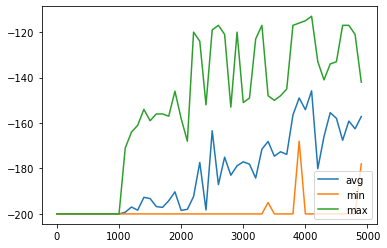

In [2]:
plt.plot(aggr_ep_reward['ep'],aggr_ep_reward['avg'],label='avg')
plt.plot(aggr_ep_reward['ep'],aggr_ep_reward['min'],label='min')
plt.plot(aggr_ep_reward['ep'],aggr_ep_reward['max'],label='max')
plt.legend(loc=4)
plt.show()

## Q Table Graphs

The actions recommended by the Q table can be graphed to demonstrate the effects of training on the agents’ decisions.

### Q at episode 0

The graph below shows the agents Q table at episode 0. The agent's Q table has been randomly initiated. The decisions recommended represent this random noise and do not show any pattern that would help it achieve its goal.


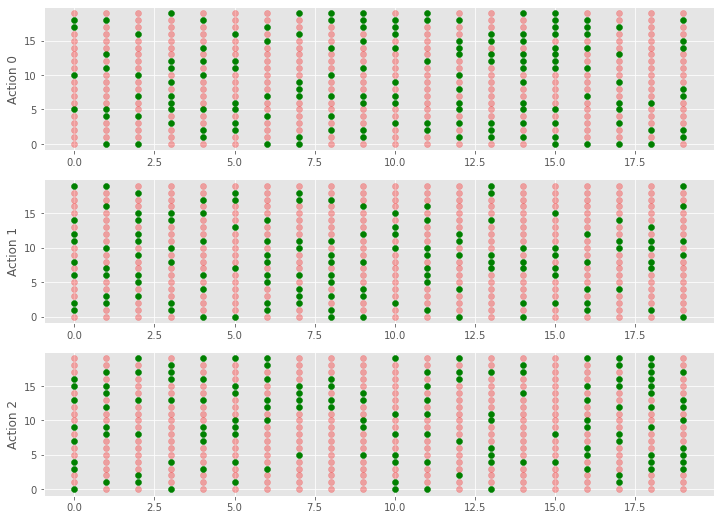

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')


def get_q_color(value, vals):
    if value == max(vals):
        return "green", 1.0
    else:
        return "red", 0.3


fig = plt.figure(figsize=(12, 9))


ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

i = 0
q_table = np.load(f"qtables_{i}-qtable.npy")


for x, x_vals in enumerate(q_table):
    for y, y_vals in enumerate(x_vals):
        ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
        ax2.scatter(x, y, c=get_q_color(y_vals[1], y_vals)[0], marker="o", alpha=get_q_color(y_vals[1], y_vals)[1])
        ax3.scatter(x, y, c=get_q_color(y_vals[2], y_vals)[0], marker="o", alpha=get_q_color(y_vals[2], y_vals)[1])

        ax1.set_ylabel("Action 0")
        ax2.set_ylabel("Action 1")
        ax3.set_ylabel("Action 2")


plt.show()

### Q at step 4900

Visualizing the Q table at the end of the agents training loop demonstrates the improvements made to its decision matrix through reinforcement learning. There are now distinct clusters of actions at the bottom of action 0, and the top of action 2, showing a preference for movement that increases its velocity as it rolls down the sides of the hill. This behavior allows the agent to achieve its goal.


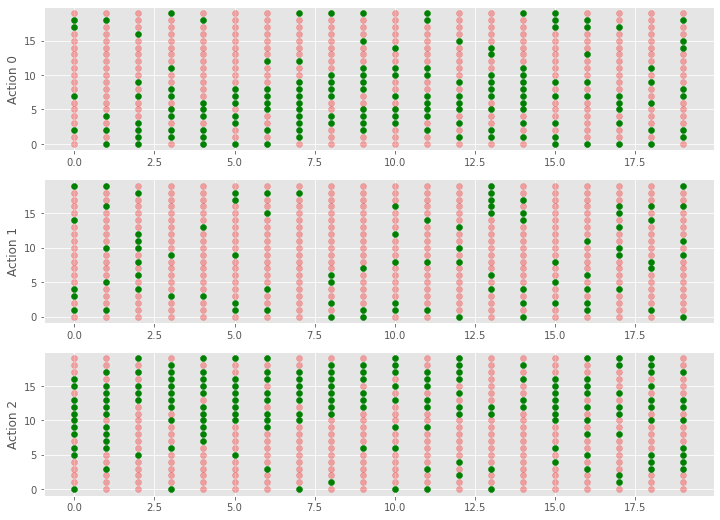

In [4]:
style.use('ggplot')


def get_q_color(value, vals):
    if value == max(vals):
        return "green", 1.0
    else:
        return "red", 0.3


fig = plt.figure(figsize=(12, 9))


ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

i = 4900
q_table = np.load(f"qtables_{i}-qtable.npy")


for x, x_vals in enumerate(q_table):
    for y, y_vals in enumerate(x_vals):
        ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
        ax2.scatter(x, y, c=get_q_color(y_vals[1], y_vals)[0], marker="o", alpha=get_q_color(y_vals[1], y_vals)[1])
        ax3.scatter(x, y, c=get_q_color(y_vals[2], y_vals)[0], marker="o", alpha=get_q_color(y_vals[2], y_vals)[1])

        ax1.set_ylabel("Action 0")
        ax2.set_ylabel("Action 1")
        ax3.set_ylabel("Action 2")


plt.show()

# Conclusion

This notebook demonstrated tabular Q learning which is just one method for improving an agent's performance in reinforcement learning. One drawback to tabular Q learning is that Q tables can become extremely large if an environment has many states and an agent has many possible actions it can take. There are other types of reinforcement learning that can be applied to solve problems with higher complexity such as deep Q learning where a reward function is approximated in a neural network. These methods could be explored in future experiments to solve problems of greater complexity.


# References

Harrison. (2019). <i> Q-Learning introduction and Q Table - Reinforcement Learning w/ Python </i>. pythonprogramming.net retreived 10/14/2022 from https://pythonprogramming.net/q-learning-reinforcement-learning-python-tutorial/